# Ликбез по Octave в сравнении с Python

In [1]:
import numpy as np
import pandas as pd

## Различия

### Условия

In [2]:
12 != 1 # in Python
# 12 ~= 1 % in Octave

True # Python
1; # % Octave

# Python: or / and
# % Octave: && / ||

### Комментарии

In [3]:
# In Python
# % In Octave

### Константы

In [4]:
# or math, or scipy
p = np.pi # in Python
# a = pi % in Octave

### Ключевые слова

In [5]:
# for i=1:10, v(i) = 2^i, end % in Octave
v = np.arange(10)
for x in range(10):
    v[x] = 2 ** x

i = 0
# while i <= 5, i = i + 1, end % in Octave
while i <= 5:
    i += 1
    
# To create a function in Octave u should create a file with func name `aa.m`
# with body: function y = aa(x) % is a func, which returns y and has x arg
# and then func bod
# for multiple outs can use `function [y1,y2] = ...`

### Матрицы

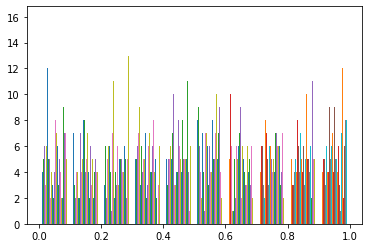

In [4]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]]) # in Python
# a = [1 2 3; 4 5 6; 7 8 9] % in Octave

np.ones((3,3)) # in Python
# ones() % in Octave

np.eye(3)
# eye(3) % in Octave

b = np.random.rand(50,50)
# b = rand(3,3) % in Octave

from matplotlib import pyplot as plt # in Python
plt.hist(b)
plt.show()

# hist(b) % in Octave



### Работа с матрицами

In [7]:
b.shape # in Python
# size(b) % in Octave

(50, 50)

#### Расширение

In [8]:
c = np.zeros((2,2))
d = np.ones((2,2))

z = np.concatenate((c,d), axis = 1) # in Python
# z = [c d] % In Octave

pd.DataFrame(z)

,0,1,2,3
0,0.0,0.0,1.0,1.0
1,0.0,0.0,1.0,1.0


### Арифметика

In [9]:
A = np.random.rand(3,3)
B = np.random.rand(3,3)
C = np.random.rand(3,4)
D = np.arange(9).reshape((3,3))
v = np.array([1,2,3])

# Sum
A + B # in Octave would be same

# Production
A @ C
# A * C % in Octave

# Element wise
v * 2
np.multiply(D, np.eye(3)) # with 2 matricies
# A .* 2 % in Octave

# Transpose
A.T
# A' % in Octave

# Max min
A.max()
#  max(A) % in Octave

# Conditions
A < 1 # same 

# Find
A[A > 0.5] # Elements
np.nonzero(A > 0.5) # Indexes
# find(A > 0.5) % in Octave

# Sum by column / row
D.sum(0)
# sum(X, 1) % in Octave

# Inversion
np.linalg.pinv(D)
# pinv(D) % in Octave

array([[-5.55555556e-01, -1.66666667e-01,  2.22222222e-01],
       [-5.55555556e-02,  2.02264713e-16,  5.55555556e-02],
       [ 4.44444444e-01,  1.66666667e-01, -1.11111111e-01]])

## Работа с датасетами


In [10]:
! cd ~/Desktop/
! pwd

/Users/love/Documents/Git/Course-Abstract/Coursera/ML


In [11]:
# load dataset.dat % in Octave would create matrix named dataset
# who / whos % in Octave shows remembered vars

# in Python
from pandas import read_csv
df = read_csv("dataset.dat", sep=" ", header=None)
df # can use df.to_numpy()

FileNotFoundError: [Errno 2] File b'dataset.dat' does not exist: b'dataset.dat'

In [12]:
df[2:4] # in Python
# df(2:4) % in Octave

ar = df.to_numpy()
z = ar[:,2] # in Python (already makes horizontal)
# ar(:, 2) % in Octave (saves direction)

pd.DataFrame(z)

NameError: name 'df' is not defined

# Графики

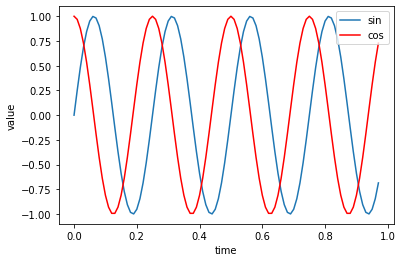

In [5]:
t = np.arange(0,0.98,0.01)
y1 = np.sin(2 * np.pi * 4 * t)
y2 = np.cos(2 * np.pi * 4 * t)

plt.plot(t,y1, label = "sin")
plt.plot(t,y2,"r", label = "cos")
plt.xlabel("time")
plt.legend()
plt.ylabel("value")

# plt.savefig("fig") would save locally as png

plt.show()

# plot (t, y1) % in Octave
# to use same canvas in Octave use `hold on`

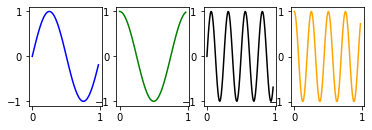

In [11]:
y11 = np.sin(2 * np.pi * t)
y12 = np.cos(2 * np.pi * t)

plt.subplot(2,4,1)
plt.plot(t, y11, "b")

plt.subplot(2,4,2)
plt.plot(t, y12,"g")

plt.subplot(2,4,3)
plt.plot(t,y1,'black')

plt.subplot(2,4,4)
plt.plot(t,y2,"orange")
plt.show()

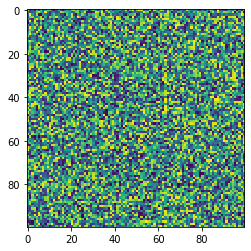

In [199]:
plt.imshow(np.random.rand(100,100))

# Первый шаг

Найти _J($\theta$)_ для датасета X = [1,2,3], Y = [1,2,3]

m = 3
predictions = [[1.2 2.4 3.6]]
squared errors = [[0.04 0.16 0.36]]
J = 0.093333


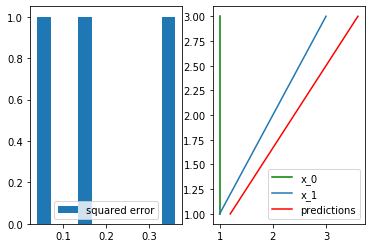

In [267]:
x = np.array([[1,1],[1,2],[1,3]]) # with x_0
y = np.array([[1],[2],[3]])
theta = np.array([[0],[1.2]]) # h(x) = 0 + x1 * 1
    
def define_cost_function(x,y,theta):
    m = x.shape[0] # Number of training examples
    
    predictions = x @ theta
    sqr_err = (predictions - y) ** 2
    J = 1 / (2 * m) * np.sum(sqr_err)
    
    plt.subplot(1,2,1)
    plt.hist(sqr_err, label = "squared error")
    plt.legend()
    
    print("m = %d\npredictions = %s\nsquared errors = %s" %(m,predictions.T, sqr_err.T))
    return (J,predictions)

(J, predictions) = define_cost_function(x,y,theta)
print("J = %f" %J)

plt.subplot(1,2,2)
plt.plot(x[:,0],y,"g", label = "x_0")
plt.plot(x[:,1],y, label = "x_1")
plt.plot(predictions,y,"r" ,label = "predictions")
plt.legend()
plt.show()
